# 2.Machine Learning Start!

## Data Generation

In [1]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect
plt.style.use(["seaborn-whitegrid"])

# ========== Parameter Matrix generation ==========
N = 3  # Maximum number of the possible peak
Data_size = 20000000
Val_size = 500000
Test_size= 50000
Train_size=Data_size-Val_size-Test_size

# Set of Parameters ready
Parameters = np.zeros((Data_size, N, 3)) 
print(Parameters.shape)

(20000000, 3, 3)


In [2]:
# Now we use the new model funtion : 
# voigt function = linear combination of Gaussian and Lorentzian function with some ratio 0.3

def voigt(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

    # Add noise: HSK
    noise_level = 0.05
    noise = np.array([np.random.rand()*noise_level - noise_level*0.5 for i in range(len(x))])
        
    return result + noise
    

In [3]:
# ========== x-domain range ==========
x = np.linspace(0, 15, 401) 
print(len(x))


401


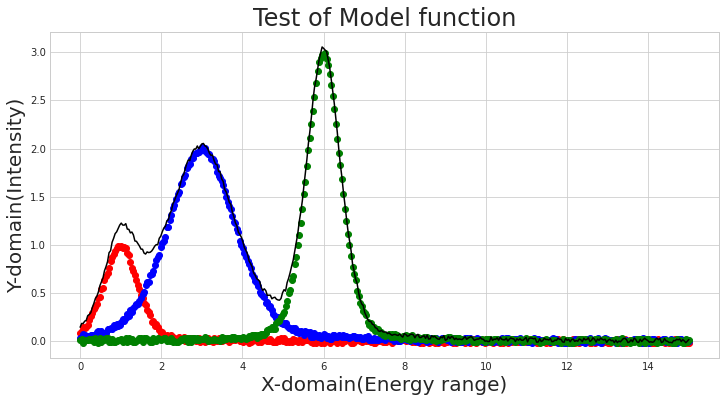

In [4]:
# ========== Checking out of the voigt function ==========
params = [1, 1, 1, 2, 3, 2, 3, 6, 1]

plt.figure(figsize = (12, 6))
plt.plot(x, voigt(x, *params), color = 'black')

plt.scatter(x, voigt(x, *params[:3]), color = 'red')
plt.scatter(x, voigt(x, *params[3:6]), color = 'blue')
plt.scatter(x, voigt(x, *params[6:]), color = 'green')

plt.title("Test of Model function", size = 24)
plt.xlabel("X-domain(Energy range)", size = 20)
plt.ylabel("Y-domain(Intensity)", size = 20)
plt.grid(True)
plt.show()

In [5]:
# ========== Generation of Voigt function Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Voigt function

        #center1 = 4 + 0.5*np.random.rand() - 0.25
        #center2 = 6 + 0.5*np.random.rand() - 0.25
        #center3 = 8 + 0.5*np.random.rand() - 0.25
        
        randamplist= []
        for k in range(N):
            randamplist.append(0.1 + np.random.rand())
        #randamplist.sort()
        #randamplist.reverse()
        
        randctrlist= []
        for k in range(N):
            randctrlist.append(2.0 + 11.0*np.random.rand())
        randctrlist.sort()
        randctrlist.reverse()
        
        randwidthlist= []
        for k in range(N):
            randwidthlist.append(0.3 + 1.6*np.random.rand())
        #randwidthlist.sort()
        #randwidthlist.reverse()
        
        
        #center4 = 10 + 0.5*np.random.rand() - 0.25
        #center5 = 12 + 0.5*np.random.rand() - 0.25
        
        #                                       amplitude      center        width
        #Parameters[i][0] = np.array([[np.random.rand(), randctrlist[0], 0.7 + 0.8*np.random.rand() ]])
        #Parameters[i][1] = np.array([[np.random.rand(), randctrlist[1], 0.7 + 0.8*np.random.rand() ]])
        #Parameters[i][2] = np.array([[np.random.rand(), randctrlist[2], 0.7 + 0.8*np.random.rand() ]])
        #Parameters[i][3] = np.array([[np.random.rand(), center4, 0.6 + 1.5*np.random.rand() ]])
        #Parameters[i][4] = np.array([[np.random.rand(), center5, 0.6 + 1.5*np.random.rand() ]])

        Parameters[i][0] = np.array([[randamplist[0], randctrlist[0], randwidthlist[0] ]])
        Parameters[i][1] = np.array([[randamplist[1], randctrlist[1], randwidthlist[1] ]])
        Parameters[i][2] = np.array([[randamplist[2], randctrlist[2], randwidthlist[2] ]])
        
# Check out
print(Parameters)  

[[[ 0.55064679 12.46112055  1.35864633]
  [ 0.16794962  5.11205153  1.06526631]
  [ 0.63932811  3.57615063  1.0479639 ]]

 [[ 1.04962699  9.93037967  0.63065553]
  [ 0.18866032  4.73523105  0.38658314]
  [ 0.78783589  4.21353882  1.72471687]]

 [[ 1.00438665 10.80239209  1.15611391]
  [ 0.48430939  9.85838664  1.8077027 ]
  [ 0.95511631  4.19380197  1.70509013]]

 ...

 [[ 0.93948151  6.38725402  1.61915587]
  [ 0.83906034  6.02414276  1.25182623]
  [ 0.95426577  5.3333392   0.85942073]]

 [[ 0.14823161 10.1068459   0.5361225 ]
  [ 0.98338576  9.98541335  0.34619906]
  [ 0.99780723  4.14228754  0.98567113]]

 [[ 0.39660689  8.21829863  0.78949277]
  [ 0.85165653  4.82828165  0.34242338]
  [ 0.13865047  4.18020096  1.63754845]]]


In [6]:
# ========== Data Generation ==========

GRAPH = []     # y-value of the Voigt function
#AREA = []      # Area of the Voigt funtion
NUM_PEAK = []  # Number of peak
AMPLITUDE = [] # Amplitude
CENTER = []    # Center
WIDTH = []     # Width

for j in Parameters:

    peak = random.randint(2, N)  # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshaping to put it as *args

    # Appending to list
    GRAPH.append(voigt(x, *j[0:3*peak]))
    #AREA.append(sum(voigt(x, *j[0:3*peak]))/len(x))
    NUM_PEAK.append(peak)
    AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
    CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
    WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))
    

In [7]:
# ========== Conversion to Numpy.array ==========
GRAPH = np.array(GRAPH)
#AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)
AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# ========== Checking out the shape ==========
print(GRAPH.shape)
#print(AREA.shape)
print(NUM_PEAK.shape)
print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(20000000, 401)
(20000000,)
(20000000, 3)
(20000000, 3)
(20000000, 3)


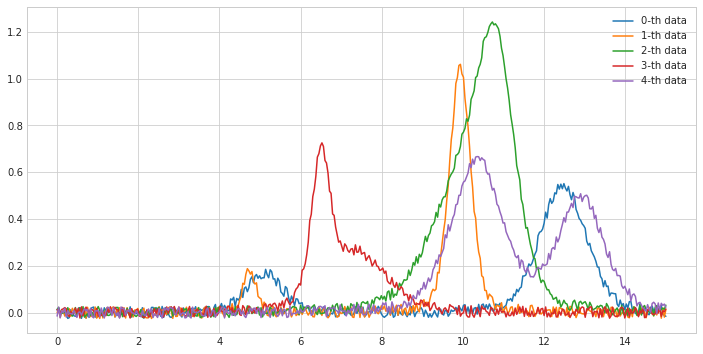

In [8]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))

for i in range(5):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)

In [9]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

tmp1_train_size=Data_size-Val_size-Test_size

# lorentzian graph
train_graph = np.array(GRAPH[:Train_size])
val_graph   = np.array(GRAPH[Train_size:(Train_size+Val_size)])
test_graph  = np.array(GRAPH[(Train_size+Val_size):])

# area label
#train_area = np.array(AREA[:Train_size])
#val_area   = np.array(AREA[Train_size:(Train_size+Val_size)])
#test_area  = np.array(AREA[(Train_size+Val_size):])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:Train_size])
val_num_peak   = np.array(NUM_PEAK[Train_size:(Train_size+Val_size)])
test_num_peak  = np.array(NUM_PEAK[(Train_size+Val_size):])

# amplitude label
train_amp = np.array(AMPLITUDE[:Train_size])
val_amp   = np.array(AMPLITUDE[Train_size:(Train_size+Val_size)])
test_amp  = np.array(AMPLITUDE[(Train_size+Val_size):])

# center label
train_center = np.array(CENTER[:Train_size])
val_center   = np.array(CENTER[Train_size:(Train_size+Val_size)])
test_center  = np.array(CENTER[(Train_size+Val_size):])

# width label
train_width = np.array(WIDTH[:Train_size])
val_width   = np.array(WIDTH[Train_size:(Train_size+Val_size)])
test_width  = np.array(WIDTH[(Train_size+Val_size):])

In [10]:
# ========== Size check ==========
#print(train_graph.shape, train_area.shape, train_num_peak.shape, 
#      train_amp.shape, train_center.shape, train_width.shape)
#print(val_graph.shape, val_area.shape, val_num_peak.shape, 
#      val_amp.shape, val_center.shape, val_width.shape)
#print(test_graph.shape, test_area.shape, test_num_peak.shape, 
#      test_amp.shape, test_center.shape, test_width.shape)

print(train_graph.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(19450000, 401) (19450000,) (19450000, 3) (19450000, 3) (19450000, 3)
(500000, 401) (500000,) (500000, 3) (500000, 3) (500000, 3)
(50000, 401) (50000,) (50000, 3) (50000, 3) (50000, 3)


In [11]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(Train_size, len(x), 1)
val_graph   = val_graph.reshape(Val_size, len(x), 1)
test_graph  = test_graph.reshape(Test_size, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(19450000, 401, 1)
(500000, 401, 1)
(50000, 401, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 61, 32)       3232        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 30, 32)       0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 27, 64)       8256        max_pooling1d[0][0]              
______________________________________________________________________________________________

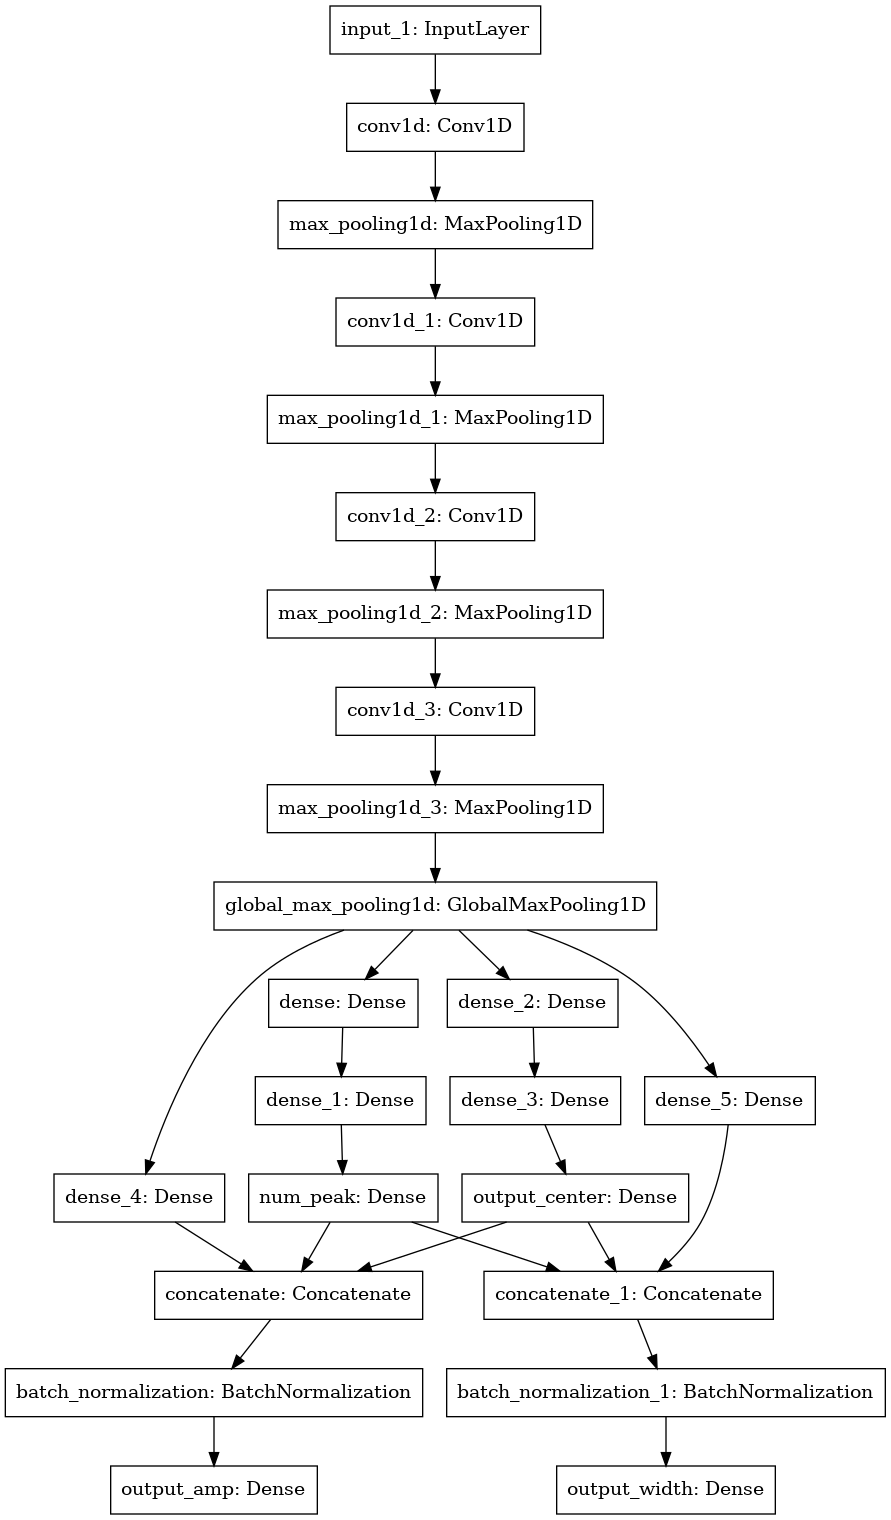

In [12]:
# 최대한 간단한 구조로 만들기!

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))
#main_inputs2 = BatchNormalization()(main_inputs)

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(32, kernel_size = 100, strides=5, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)

x_conv2 = Conv1D(64, kernel_size = 4, activation = 'relu')(x_pooling1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)

x_conv3 = Conv1D(128, kernel_size = 4, activation = 'relu')(x_pooling2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)

x_conv4 = Conv1D(192, kernel_size = 2, activation = 'relu')(x_pooling3)
x_pooling4 = MaxPooling1D(pool_size = 2)(x_conv4)

x_GMpooling = GlobalMaxPooling1D()(x_pooling4)


# output : area
#hidden_area1 = Dense(50, activation = 'relu')(x_GMpooling)
#hidden_area2 = Dense(20, activation = 'relu')(hidden_area1)
#output_area = Dense(1, activation = 'linear', name = 'area')(hidden_area2)


# output : number of peak
hidden_num_peak1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_num_peak2 = Dense(100, activation = 'relu')(hidden_num_peak1)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(hidden_num_peak2)

hidden_center1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_center2 = Dense(100, activation = 'relu')(hidden_center1)
#hidden_center3 = Dense(30, activation = 'relu')(hidden_center2)
output_center = Dense(3, activation = 'linear', name = 'output_center')(hidden_center2)



# merging features into one layer
#merge = concatenate([output_num_peak, output_center, x_GMpooling])
#merge2 = BatchNormalization()(merge)


# prediction output
hidden_amp1 = Dense(50, activation = 'relu')(x_GMpooling)
amp_merge   = concatenate([output_num_peak, output_center, hidden_amp1])
amp_merge2  = BatchNormalization()(amp_merge)
output_amp  = Dense(3, activation = 'linear', name = 'output_amp')(amp_merge2)


hidden_width1 = Dense(50, activation = 'relu')(x_GMpooling)
width_merge   = concatenate([output_num_peak, output_center, hidden_width1])
width_merge2  = BatchNormalization()(width_merge)
output_width  = Dense(3, activation = 'linear', name = 'output_width')(width_merge2)



# prediction output
#hidden_amp1 = Dense(50, activation = 'relu')(merge2)
#output_amp = Dense(3, activation = 'linear', name = 'output_amp')(hidden_amp1)


#hidden_width1 = Dense(50, activation = 'relu')(merge2)
#output_width = Dense(3, activation = 'linear', name = 'output_width')(hidden_width1)





# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_num_peak, output_amp, output_center, output_width])

# Summarize layers
print(model.summary())
# plot graph
plot_model(model)

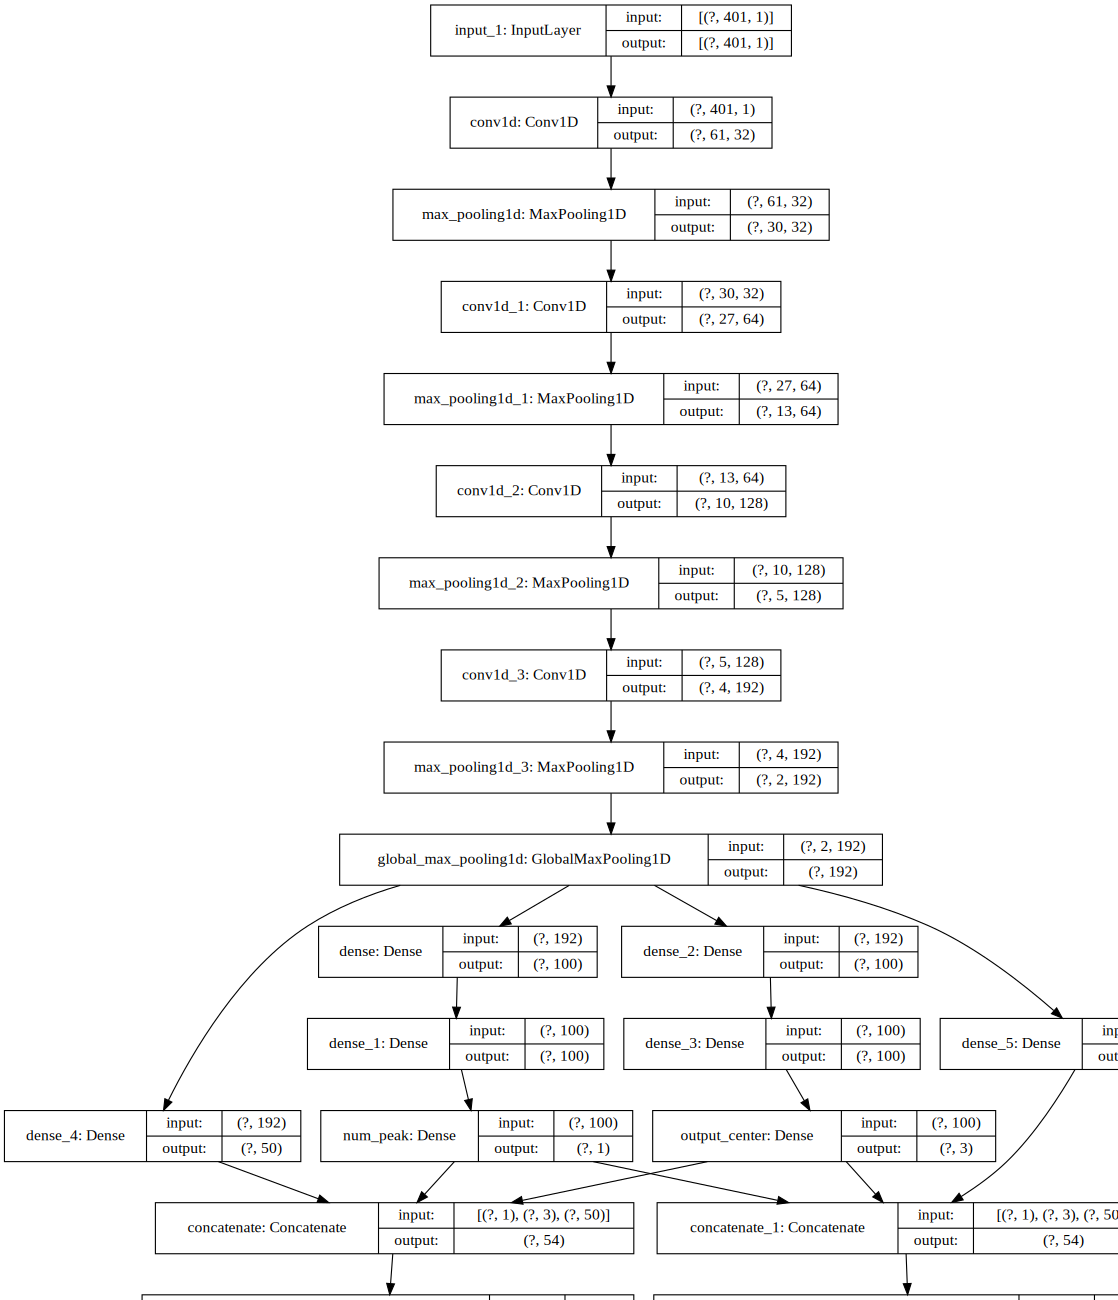

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [14]:
# 학습방법 설정
model.compile(loss = ['mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [15]:
# 이 부분에서 콜백 함수에 넣을 콜백리스트 정의할 것!
import keras

callbacks_list = [
    # 조기종료 콜백함수 : val loss 감시, 10에폭까지 기다림
    #keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
    
    # 모델 체크포인트 콜백함수 : 모델을 h5로 저장, 최적 모델만을 저장
    keras.callbacks.ModelCheckpoint(filepath = "LAST_CODE_Model_1.h5", monitor = 'val_loss', save_best_only = True),
    
    # 학습률 감소 콜백함수 : val loss 감시, 검증 손실 향상안될때 10분의 1감소시킴
    keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)
]




In [ ]:
%%time
hist = model.fit(train_graph, [train_num_peak, train_amp, train_center, train_width],
                 epochs = 200,
                 batch_size = 10000,
                 callbacks = callbacks_list,
                 validation_data = (val_graph, [val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)



Epoch 1/200
1945/1945 - 106s - loss: 2.7297 - num_peak_loss: 0.1669 - output_amp_loss: 0.0501 - output_center_loss: 2.3737 - output_width_loss: 0.1390 - num_peak_mae: 0.2611 - output_amp_mae: 0.1630 - output_center_mae: 0.8771 - output_width_mae: 0.2620 - val_loss: 1.2797 - val_num_peak_loss: 0.0623 - val_output_amp_loss: 0.0358 - val_output_center_loss: 1.1071 - val_output_width_loss: 0.0745 - val_num_peak_mae: 0.1521 - val_output_amp_mae: 0.1399 - val_output_center_mae: 0.5204 - val_output_width_mae: 0.1874 - lr: 0.0010
Epoch 2/200
1945/1945 - 108s - loss: 1.1366 - num_peak_loss: 0.0565 - output_amp_loss: 0.0295 - output_center_loss: 0.9876 - output_width_loss: 0.0630 - num_peak_mae: 0.1363 - output_amp_mae: 0.1212 - output_center_mae: 0.4662 - output_width_mae: 0.1664 - val_loss: 0.9741 - val_num_peak_loss: 0.0465 - val_output_amp_loss: 0.0265 - val_output_center_loss: 0.8461 - val_output_width_loss: 0.0549 - val_num_peak_mae: 0.1256 - val_output_amp_mae: 0.1158 - val_output_center_

In [44]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

loss
num_peak_loss
output_amp_loss
output_center_loss
output_width_loss
num_peak_mae
output_amp_mae
output_center_mae
output_width_mae
val_loss
val_num_peak_loss
val_output_amp_loss
val_output_center_loss
val_output_width_loss
val_num_peak_mae
val_output_amp_mae
val_output_center_mae
val_output_width_mae
lr


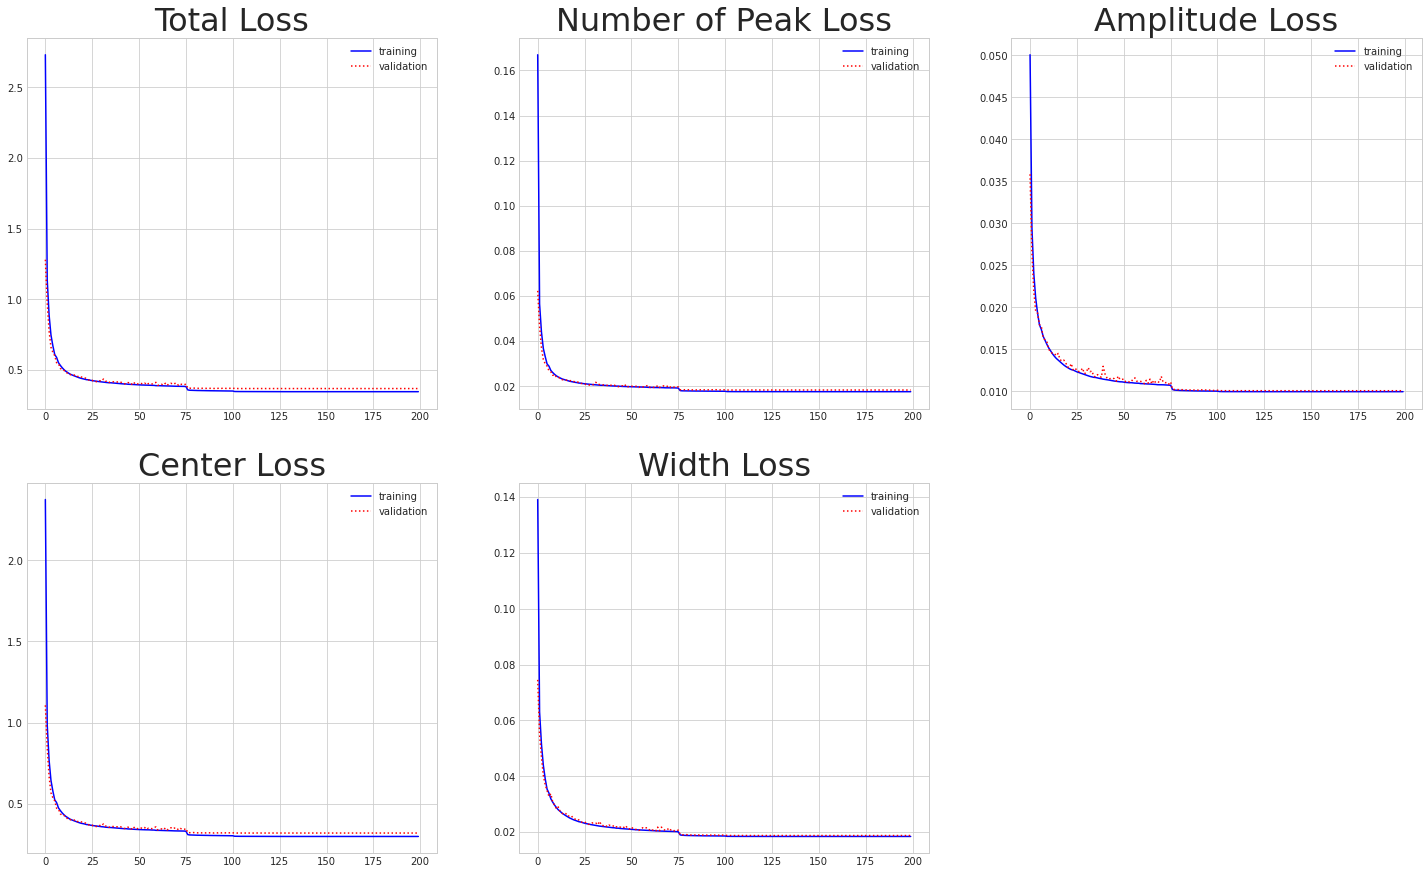

In [45]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()

#plt.subplot(232)
#plt.plot(hist.history['area_loss'], 'b-', label = 'training')
#plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation')
#plt.grid(True)
#plt.title("Area Loss", size = 32)
#plt.legend()

plt.subplot(232)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Amplitude Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Center Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Width Loss", size = 32)
plt.legend()



### Test data

In [46]:
# test_graph=train_graph[:50000]

print(test_graph.shape)

(50000, 401, 1)


In [47]:
prediction = model.predict(test_graph)
print(len(prediction))

4


In [48]:
#print(prediction[0].shape)  # area
print(prediction[0].shape)  # num_peak
print(prediction[1].shape)  # amplitude
print(prediction[2].shape)  # center
print(prediction[3].shape)  # width

(50000, 1)
(50000, 3)
(50000, 3)
(50000, 3)


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


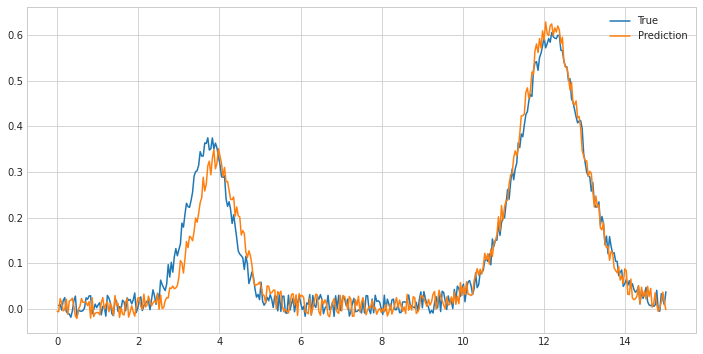

Predicted num_peak: [2.0452523]
     True num_peak: 2
Predicted amplitude: [ 0.62278235  0.3296762  -0.00879271]
     True amplitude: [0.59837807 0.36417719 0.        ]
Predicted center: [12.155492    3.9280252   0.13790417]
     True center: [12.18216545  3.72989034  0.        ]
Predicted width: [1.864146   1.2269585  0.03806068]
     True width: [1.88478915 1.25278999 0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


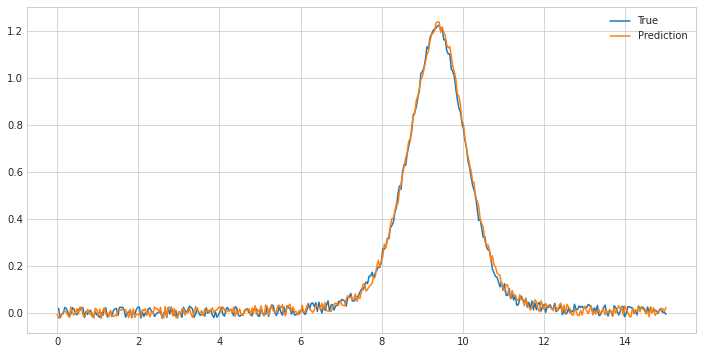

Predicted num_peak: [2.020472]
     True num_peak: 2
Predicted amplitude: [0.64979076 0.6023892  0.00412005]
     True amplitude: [0.96819753 0.27776723 0.        ]
Predicted center: [9.511757   9.205577   0.21365702]
     True center: [9.43989853 9.0153917  0.        ]
Predicted width: [1.4798083  1.8019025  0.03258802]
     True width: [1.54992239 1.85394531 0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


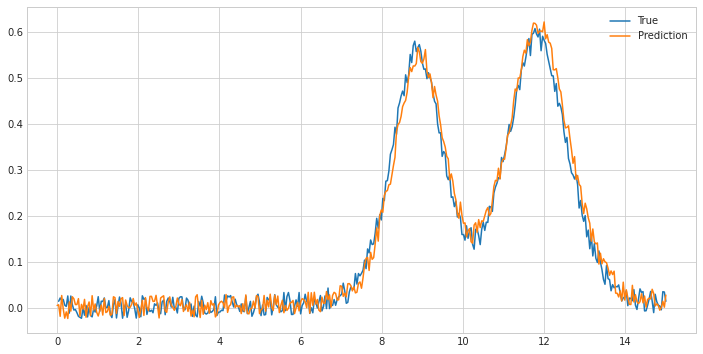

Predicted num_peak: [2.0117693]
     True num_peak: 2
Predicted amplitude: [0.6045921  0.54096264 0.00070746]
     True amplitude: [0.5808214  0.55261408 0.        ]
Predicted center: [11.861302    8.925156    0.11895478]
     True center: [11.83521032  8.86824843  0.        ]
Predicted width: [1.8012235  1.4924546  0.02455021]
     True width: [1.78421016 1.47481605 0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


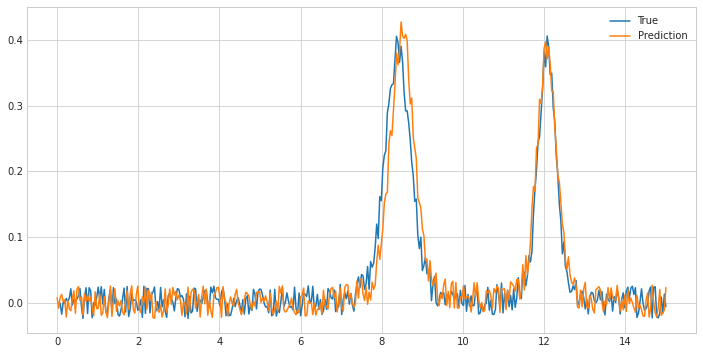

Predicted num_peak: [2.0182738]
     True num_peak: 2
Predicted amplitude: [0.3948751  0.4133287  0.00533067]
     True amplitude: [0.38187985 0.38338312 0.        ]
Predicted center: [12.066287   8.50537    0.1136744]
     True center: [12.07026934  8.39437238  0.        ]
Predicted width: [0.5643096  0.70223516 0.01332976]
     True width: [0.51640962 0.73742621 0.        ]


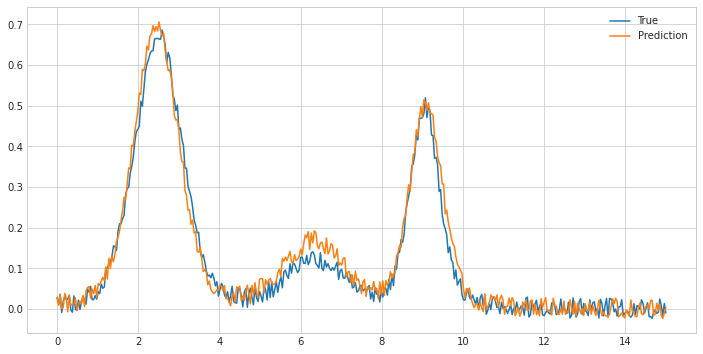

Predicted num_peak: [3.0027642]
     True num_peak: 3
Predicted amplitude: [0.50229084 0.16159876 0.69900703]
     True amplitude: [0.49337484 0.11612311 0.67520433]
Predicted center: [9.092895  6.3195114 2.4431336]
     True center: [9.0591477  6.35608236 2.49762903]
Predicted width: [0.9599096 1.7706441 1.312984 ]
     True width: [0.87359936 1.72557591 1.37609929]


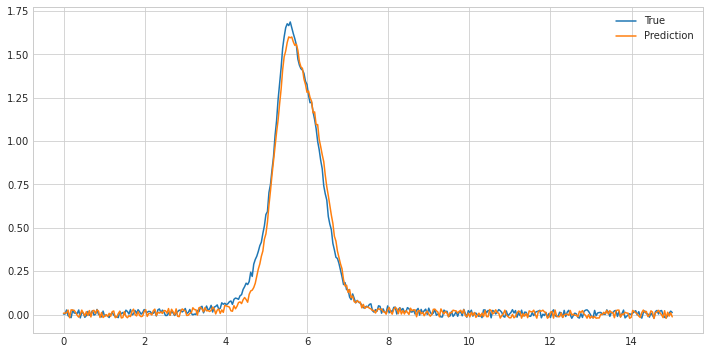

Predicted num_peak: [3.0226974]
     True num_peak: 3
Predicted amplitude: [0.7589785  0.6987815  0.76547915]
     True amplitude: [0.44203768 1.05920619 0.55925528]
Predicted center: [6.2413006 5.6275053 5.502305 ]
     True center: [6.13335711 5.66720573 5.47367772]
Predicted width: [0.8691922  1.0136456  0.76005733]
     True width: [0.86868736 1.30613747 0.47864315]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


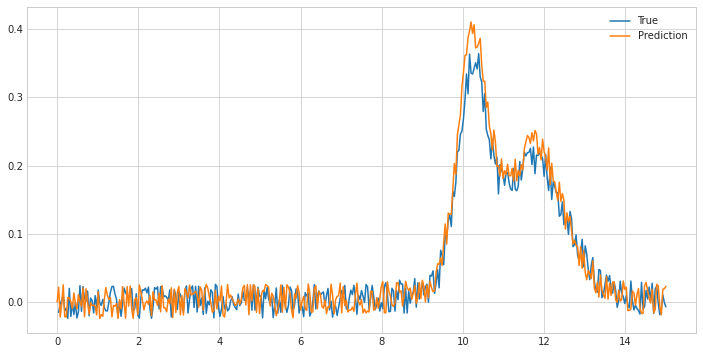

Predicted num_peak: [2.0079415]
     True num_peak: 2
Predicted amplitude: [0.22068498 0.3694979  0.00041258]
     True amplitude: [0.2004507  0.32051705 0.        ]
Predicted center: [11.797996   10.244909    0.08196318]
     True center: [11.77633071 10.24748761  0.        ]
Predicted width: [1.6822941  0.90776694 0.01315404]
     True width: [1.82292206 0.8762344  0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


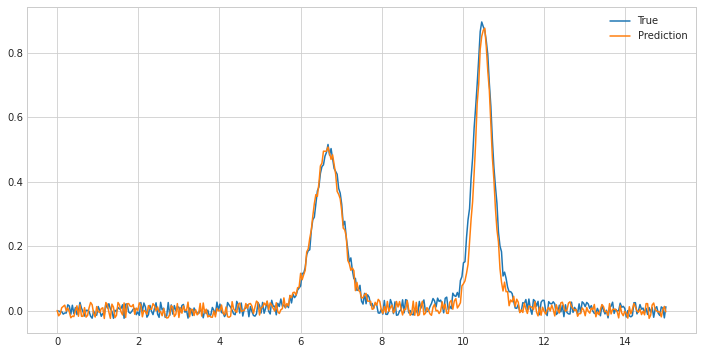

Predicted num_peak: [2.0084624]
     True num_peak: 2
Predicted amplitude: [ 0.87913215  0.4972206  -0.0027615 ]
     True amplitude: [0.88977353 0.50015533 0.        ]
Predicted center: [10.511206    6.6655254   0.04722035]
     True center: [10.49671313  6.69122052  0.        ]
Predicted width: [0.47437212 0.8117412  0.01937474]
     True width: [0.5487698  0.81281644 0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


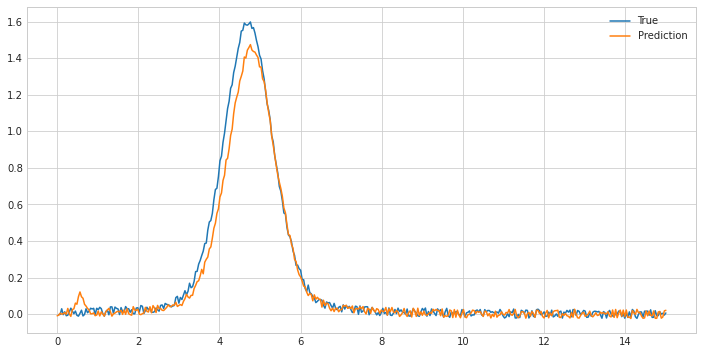

Predicted num_peak: [2.170247]
     True num_peak: 2
Predicted amplitude: [0.6874821  0.84473217 0.08976097]
     True amplitude: [0.85465465 0.83516768 0.        ]
Predicted center: [4.9578905 4.6385593 0.5573548]
     True center: [4.89049741 4.52586303 0.        ]
Predicted width: [1.2581208  1.3720177  0.19285442]
     True width: [1.35051132 1.35301136 0.        ]


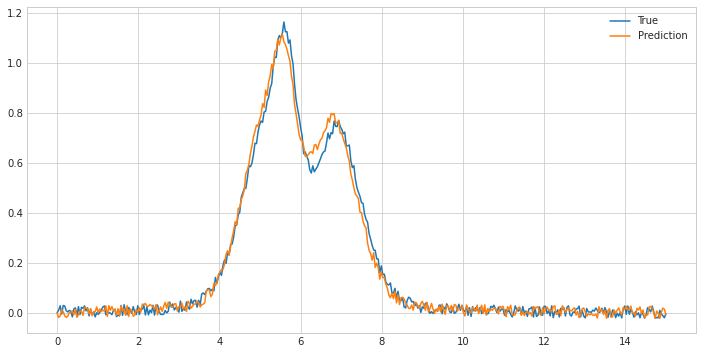

Predicted num_peak: [3.0176477]
     True num_peak: 3
Predicted amplitude: [0.74817324 0.64120513 0.64267504]
     True amplitude: [0.71788736 0.69316217 0.62465101]
Predicted center: [6.791402  5.5936995 4.9940443]
     True center: [6.91110736 5.64251962 5.04117378]
Predicted width: [1.4399073 0.7044015 1.2374865]
     True width: [1.39579417 0.70682062 1.33898075]


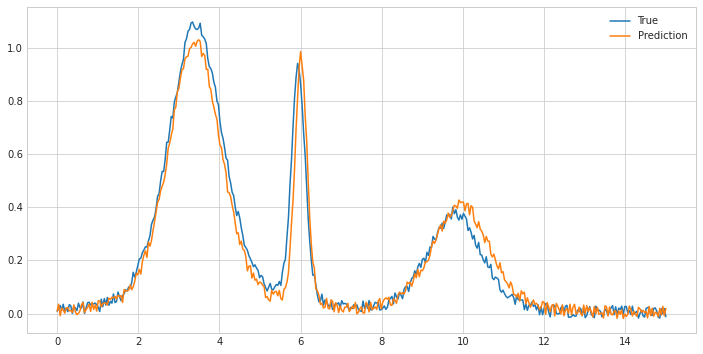

Predicted num_peak: [2.9920807]
     True num_peak: 3
Predicted amplitude: [0.4090494 0.9472043 1.0267501]
     True amplitude: [0.37258358 0.90197    1.08892507]
Predicted center: [9.944793  6.0115767 3.3903477]
     True center: [9.80502685 5.94670805 3.41579066]
Predicted width: [1.7093599  0.35876378 1.5512503 ]
     True width: [1.58869066 0.4108608  1.63066596]


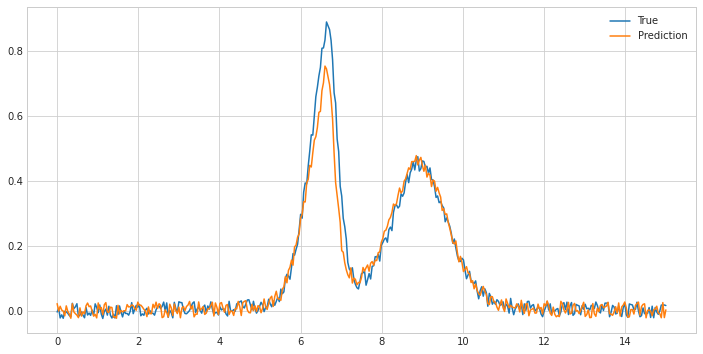

Predicted num_peak: [2.9892874]
     True num_peak: 3
Predicted amplitude: [0.45784295 0.39270687 0.43935648]
     True amplitude: [0.44829428 0.59696662 0.4207538 ]
Predicted center: [8.89198   6.673539  6.3933287]
     True center: [8.93144919 6.70382328 6.34919461]
Predicted width: [1.6807189  0.37444222 0.904549  ]
     True width: [1.60155507 0.5361473  0.8233814 ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


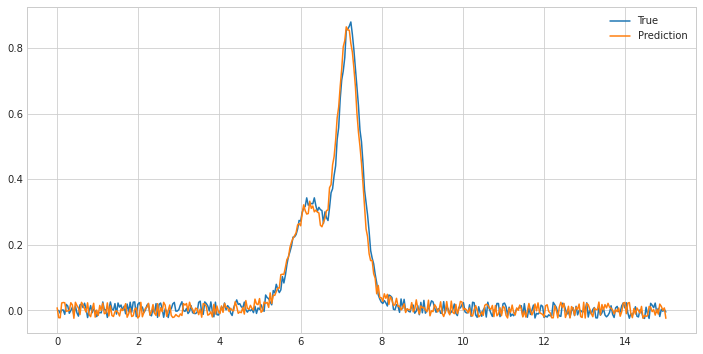

Predicted num_peak: [2.0138757]
     True num_peak: 2
Predicted amplitude: [ 0.8357687   0.29386258 -0.01179045]
     True amplitude: [0.85474911 0.32327976 0.        ]
Predicted center: [7.1724696  6.168725   0.06640899]
     True center: [7.21220387 6.1862116  0.        ]
Predicted width: [0.66744864 0.9322947  0.01391299]
     True width: [0.65593038 0.90065248 0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


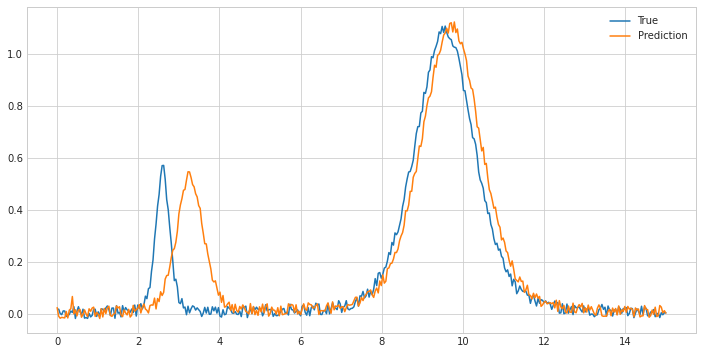

Predicted num_peak: [2.2045577]
     True num_peak: 2
Predicted amplitude: [1.1079104 0.5272246 0.0467824]
     True amplitude: [1.09795224 0.55931024 0.        ]
Predicted center: [9.709276  3.2784278 0.3711847]
     True center: [9.55260938 2.59998402 0.        ]
Predicted width: [1.7668071  0.77349865 0.06603141]
     True width: [1.74122591 0.40047651 0.        ]


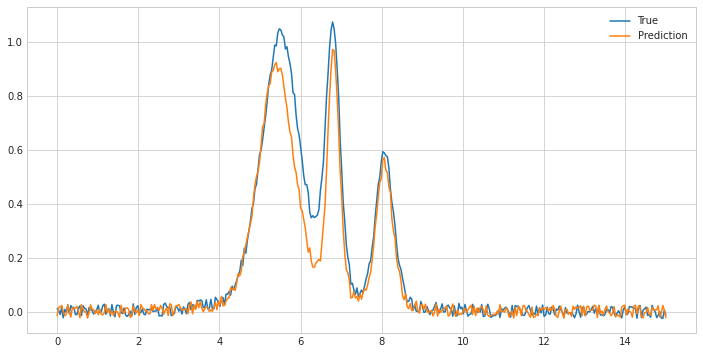

Predicted num_peak: [2.9882565]
     True num_peak: 3
Predicted amplitude: [0.5472367  0.92688346 0.91149616]
     True amplitude: [0.57068056 1.0136407  1.02197417]
Predicted center: [8.06647   6.8113422 5.4064837]
     True center: [8.07347047 6.79627133 5.51038155]
Predicted width: [0.4868726  0.35663646 1.0636772 ]
     True width: [0.5364487  0.42608197 1.13975764]


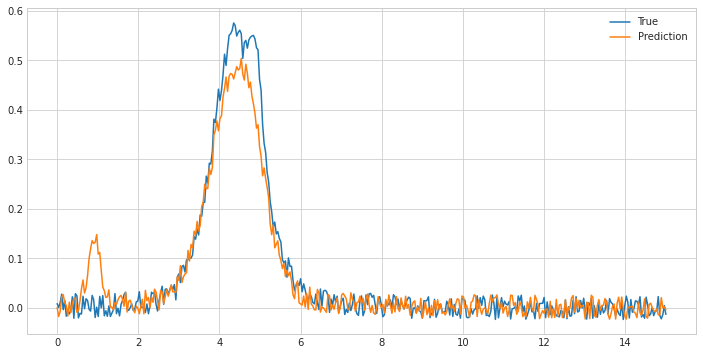

Predicted num_peak: [2.3308785]
     True num_peak: 3
Predicted amplitude: [0.08421355 0.46231756 0.14093317]
     True amplitude: [0.17973556 0.26184313 0.29899171]
Predicted center: [4.82137   4.3576803 0.9192095]
     True center: [4.91899282 4.5144956  4.29338506]
Predicted width: [0.6529704  1.4390057  0.35475713]
     True width: [0.35304285 1.5609161  1.17552085]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


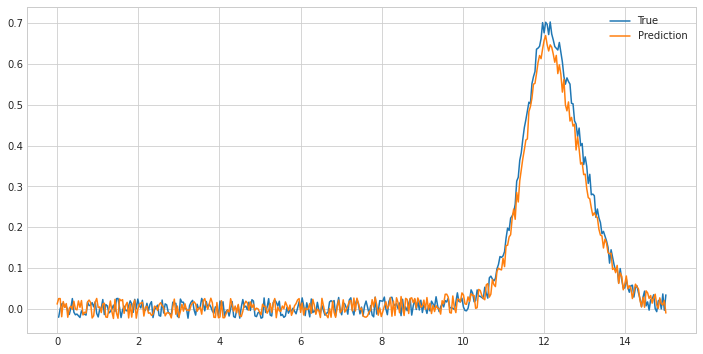

Predicted num_peak: [2.0072165]
     True num_peak: 2
Predicted amplitude: [0.2901614  0.47646636 0.00845613]
     True amplitude: [0.26399984 0.57312827 0.        ]
Predicted center: [12.678357   11.953026    0.13682401]
     True center: [12.7927092  11.98403731  0.        ]
Predicted width: [1.5787456  1.1836987  0.01481761]
     True width: [1.444808   1.28317823 0.        ]


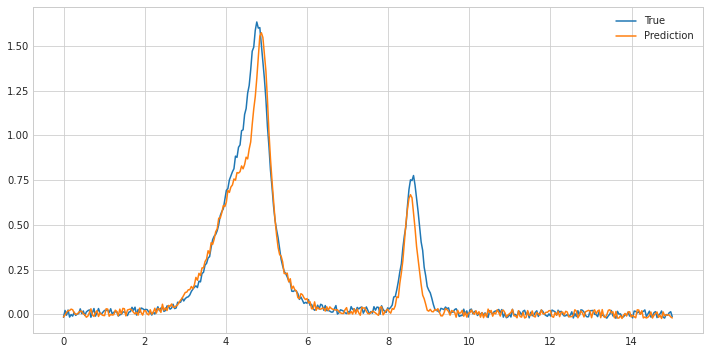

Predicted num_peak: [3.0090022]
     True num_peak: 3
Predicted amplitude: [0.6751549 1.0174727 0.7823796]
     True amplitude: [0.76331346 0.94471443 0.86383202]
Predicted center: [8.5473175 4.898305  4.3966846]
     True center: [8.60601411 4.82025261 4.41925089]
Predicted width: [0.34571758 0.38330013 1.5050141 ]
     True width: [0.4559922  0.49563616 1.38012111]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


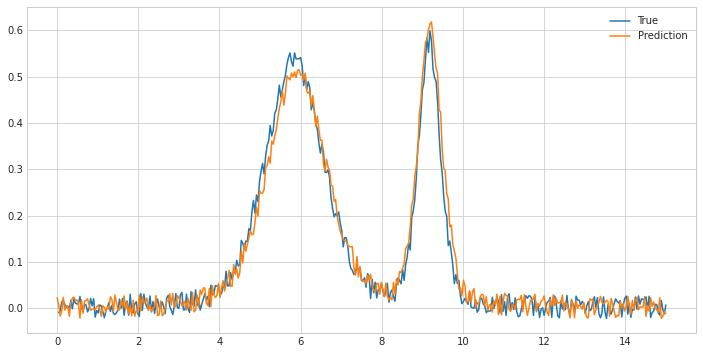

Predicted num_peak: [2.0219269]
     True num_peak: 2
Predicted amplitude: [ 0.59158254  0.5095899  -0.00163987]
     True amplitude: [0.5688755  0.53268463 0.        ]
Predicted center: [9.191821   5.9087563  0.13576245]
     True center: [9.17024264 5.8404067  0.        ]
Predicted width: [0.7182063  1.7287838  0.02359451]
     True width: [0.63970867 1.74224264 0.        ]


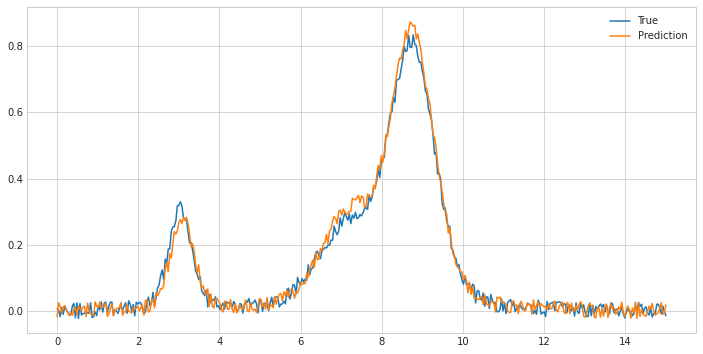

Predicted num_peak: [2.9937916]
     True num_peak: 3
Predicted amplitude: [0.82862586 0.2747557  0.2784756 ]
     True amplitude: [0.79588311 0.23628561 0.30486128]
Predicted center: [8.747537  7.138405  3.0829842]
     True center: [8.74175544 7.08014209 3.03003357]
Predicted width: [1.3270319 1.5603752 0.6989434]
     True width: [1.35845058 1.6875357  0.67609587]


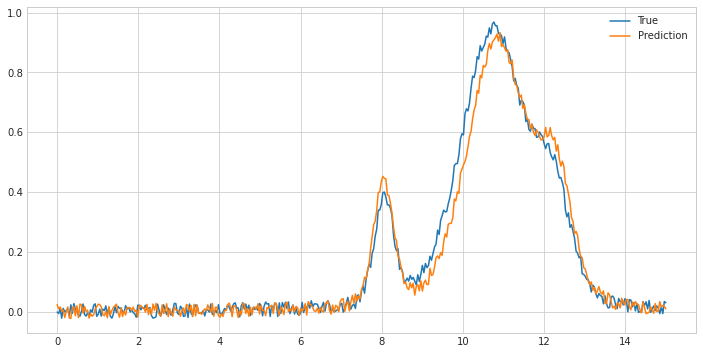

Predicted num_peak: [2.9955878]
     True num_peak: 3
Predicted amplitude: [0.39037576 0.9061911  0.41750863]
     True amplitude: [0.32982056 0.94600835 0.36516614]
Predicted center: [12.28794  10.843468  8.043371]
     True center: [12.22360088 10.73589084  8.05852613]
Predicted width: [1.011884  1.7872373 0.5965247]
     True width: [1.03130962 1.88798628 0.58291408]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


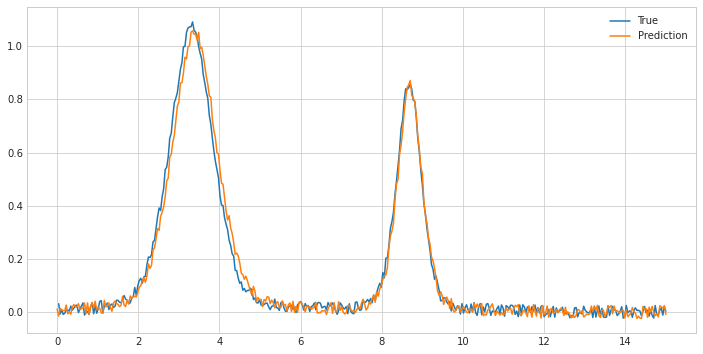

Predicted num_peak: [2.0550294]
     True num_peak: 2
Predicted amplitude: [0.8441782  1.0462983  0.01673925]
     True amplitude: [0.86569274 1.06753044 0.        ]
Predicted center: [8.692148   3.3856404  0.15152943]
     True center: [8.67205113 3.30879433 0.        ]
Predicted width: [0.7207317  1.3118023  0.05231585]
     True width: [0.72355626 1.27490705 0.        ]


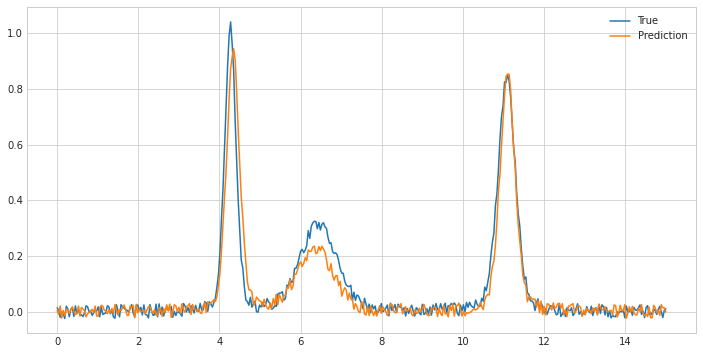

Predicted num_peak: [2.9979873]
     True num_peak: 3
Predicted amplitude: [0.85476243 0.22802389 0.9325657 ]
     True amplitude: [0.84696259 0.3166121  1.02363163]
Predicted center: [11.097852  6.352545  4.334447]
     True center: [11.08057332  6.43367397  4.27057909]
Predicted width: [0.4460842  1.0580218  0.37588096]
     True width: [0.50445716 1.04868211 0.32801121]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


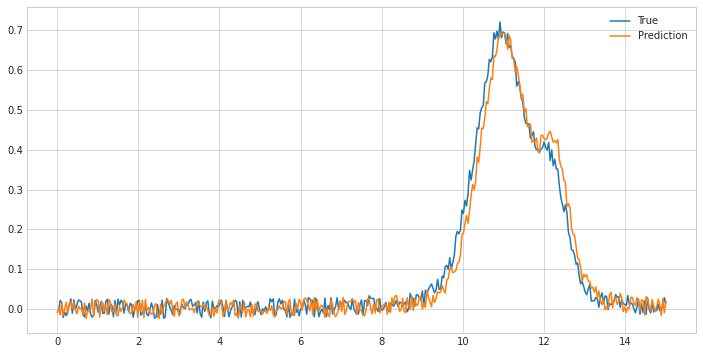

Predicted num_peak: [2.0131626]
     True num_peak: 2
Predicted amplitude: [0.3269978  0.67494977 0.00297883]
     True amplitude: [0.27377287 0.69382525 0.        ]
Predicted center: [12.2763     11.008432    0.12274683]
     True center: [12.2189431  10.92853617  0.        ]
Predicted width: [0.8527262 1.410057  0.0210153]
     True width: [0.91036862 1.46362374 0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


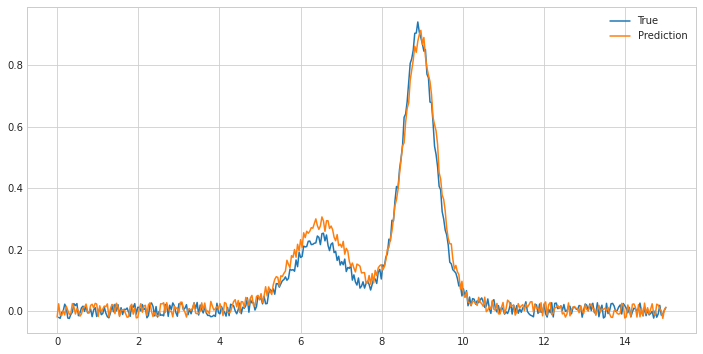

Predicted num_peak: [2.0226097]
     True num_peak: 2
Predicted amplitude: [0.88478404 0.2768731  0.00255971]
     True amplitude: [0.9120889  0.22492479 0.        ]
Predicted center: [8.949283   6.4836235  0.10717213]
     True center: [8.90913655 6.44805666 0.        ]
Predicted width: [0.9908113 1.6780096 0.0378821]
     True width: [0.95870564 1.61592548 0.        ]


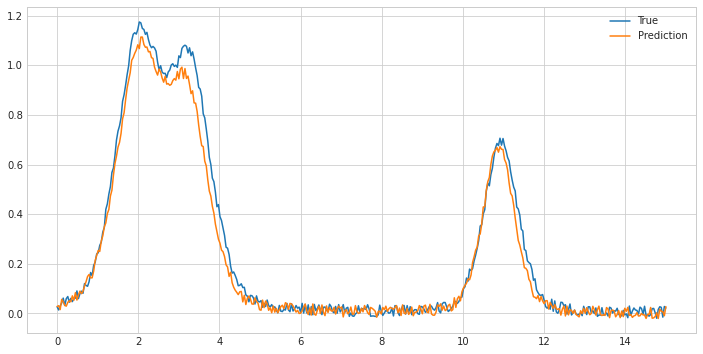

Predicted num_peak: [3.0123186]
     True num_peak: 3
Predicted amplitude: [0.66702694 0.8115117  1.0071554 ]
     True amplitude: [0.68784901 0.94201974 1.08651583]
Predicted center: [10.880416   3.2197978  2.011771 ]
     True center: [10.93691405  3.28982     2.00544749]
Predicted width: [0.9338719 1.2138443 1.3197881]
     True width: [1.00870929 1.21126633 1.30261833]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


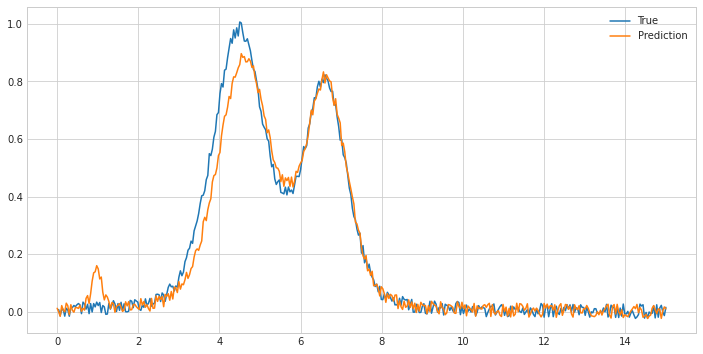

Predicted num_peak: [2.2266636]
     True num_peak: 2
Predicted amplitude: [0.7778633  0.86778885 0.14303079]
     True amplitude: [0.77374774 0.96757293 0.        ]
Predicted center: [6.619239  4.60954   0.9837742]
     True center: [6.60535971 4.4799694  0.        ]
Predicted width: [1.2779393  1.5660499  0.27166748]
     True width: [1.2823989  1.56465887 0.        ]


<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-decabfe8a9b7>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


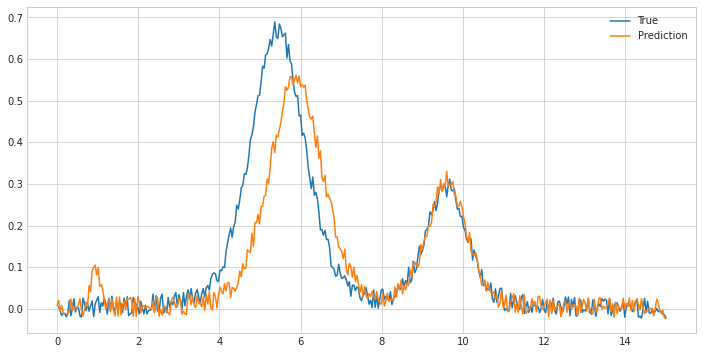

Predicted num_peak: [2.1630147]
     True num_peak: 2
Predicted amplitude: [0.3001311  0.5550055  0.10604282]
     True amplitude: [0.28498098 0.66749489 0.        ]
Predicted center: [9.596873  5.879161  0.9520203]
     True center: [9.59901697 5.43271358 0.        ]
Predicted width: [1.2034414  1.559335   0.23195745]
     True width: [1.26093265 1.59883741 0.        ]


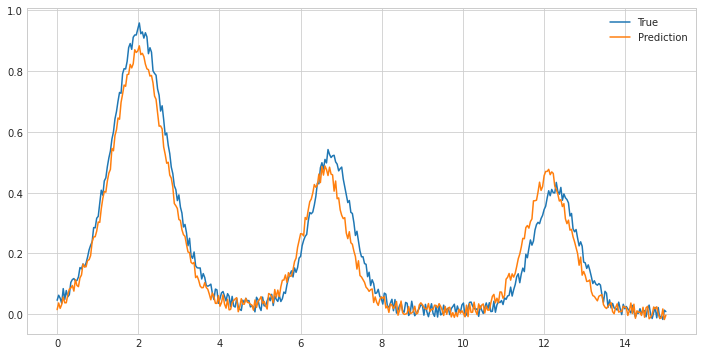

Predicted num_peak: [2.9996867]
     True num_peak: 3
Predicted amplitude: [0.44939145 0.46169728 0.8612405 ]
     True amplitude: [0.41160497 0.52352852 0.93242965]
Predicted center: [12.104118   6.6175184  2.0138333]
     True center: [12.27932331  6.7564613   2.02624765]
Predicted width: [1.2963198 1.2598679 1.6050276]
     True width: [1.30602864 1.24061903 1.66663612]


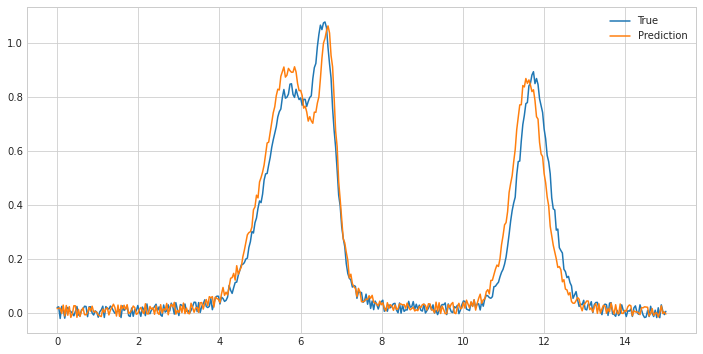

Predicted num_peak: [2.9971404]
     True num_peak: 3
Predicted amplitude: [0.8683754  0.7571027  0.89971054]
     True amplitude: [0.8699787  0.77597812 0.81250204]
Predicted center: [11.602176   6.6872606  5.7131405]
     True center: [11.73905236  6.60816051  5.72118719]
Predicted width: [0.9423558  0.46592483 1.5113256 ]
     True width: [0.93263698 0.57241582 1.45781012]


In [49]:
for i in range(30):
    
    test_amp[i] = np.array(test_amp[i])
    test_center[i] = np.array(test_center[i])
    test_width[i] = np.array(test_width[i])
    
    test_params = np.stack((test_amp[i], test_center[i], test_width[i]))
    test_params = test_params.T.reshape(9)
    test_params = list(test_params)
    
    #########################################################
    prediction[1][i] = np.array(prediction[1][i])
    prediction[2][i] = np.array(prediction[2][i])
    prediction[3][i] = np.array(prediction[3][i])
    
    predict_params = np.stack((prediction[1][i], prediction[2][i], prediction[3][i]))
    predict_params = predict_params.T.reshape(9)
    predict_params = list(predict_params)
    
    ########################################################
    print('======================================================================')
    plt.figure(figsize = (12, 6))
    plt.plot(x, voigt(x, *test_params), label = 'True')
    plt.plot(x, voigt(x, *predict_params), label = 'Prediction')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    #print("Predicted area:", prediction[0][i])
    #print("     True area:", test_area[i])

    print("Predicted num_peak:", prediction[0][i])
    print("     True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[1][i])
    print("     True amplitude:", test_amp[i] )

    print("Predicted center:", prediction[2][i])
    print("     True center:", test_center[i])

    print("Predicted width:", prediction[3][i])
    print("     True width:", test_width[i])
    print('======================================================================')
    
    

# Real XPS data fitting

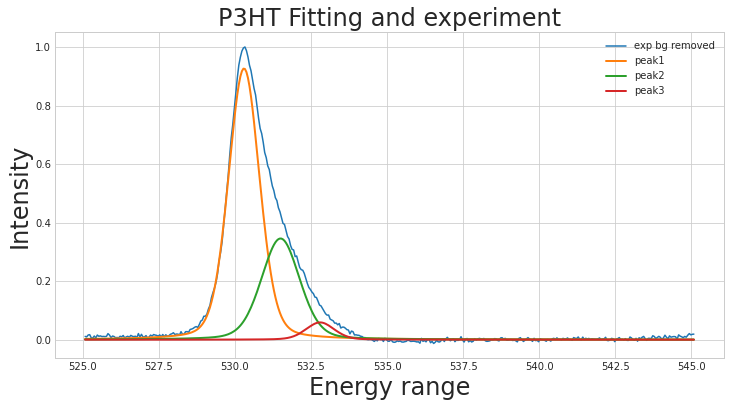

In [71]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()


(1, 401, 1)


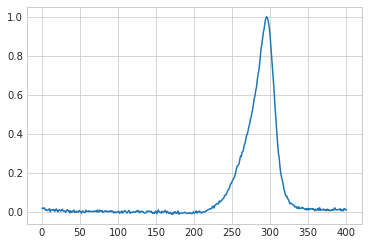

In [72]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)
plt.plot(test_result[0])

In [73]:
predict = model.predict(test_result)
print(predict)


[array([[3.008441]], dtype=float32), array([[0.6235727, 0.3178326, 0.4224222]], dtype=float32), array([[11.246236, 10.663792, 10.056307]], dtype=float32), array([[0.8465633, 1.1264158, 1.4008725]], dtype=float32)]


In [74]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [75]:
new_predict

[array([3.008441], dtype=float32),
 array([0.6235727, 0.3178326, 0.4224222], dtype=float32),
 array([11.246236, 10.663792, 10.056307], dtype=float32),
 array([0.8465633, 1.1264158, 1.4008725], dtype=float32)]

In [76]:
print(new_predict[0].shape)  # num_peak
print(new_predict[1].shape)  # amplitude
print(new_predict[2].shape)  # center
print(new_predict[3].shape)  # width
#print(new_predict[4].shape)  

(1,)
(3,)
(3,)
(3,)


In [77]:
peak_1 = [new_predict[1][0], new_predict[2][0], new_predict[3][0]]
peak_2 = [new_predict[1][1], new_predict[2][1], new_predict[3][1]]
peak_3 = [new_predict[1][2], new_predict[2][2], new_predict[3][2]]

predict_params = peak_1 + peak_2 + peak_3

In [78]:
print(predict_params)

[0.6235727, 11.246236, 0.8465633, 0.3178326, 10.663792, 1.1264158, 0.4224222, 10.056307, 1.4008725]


# 비교

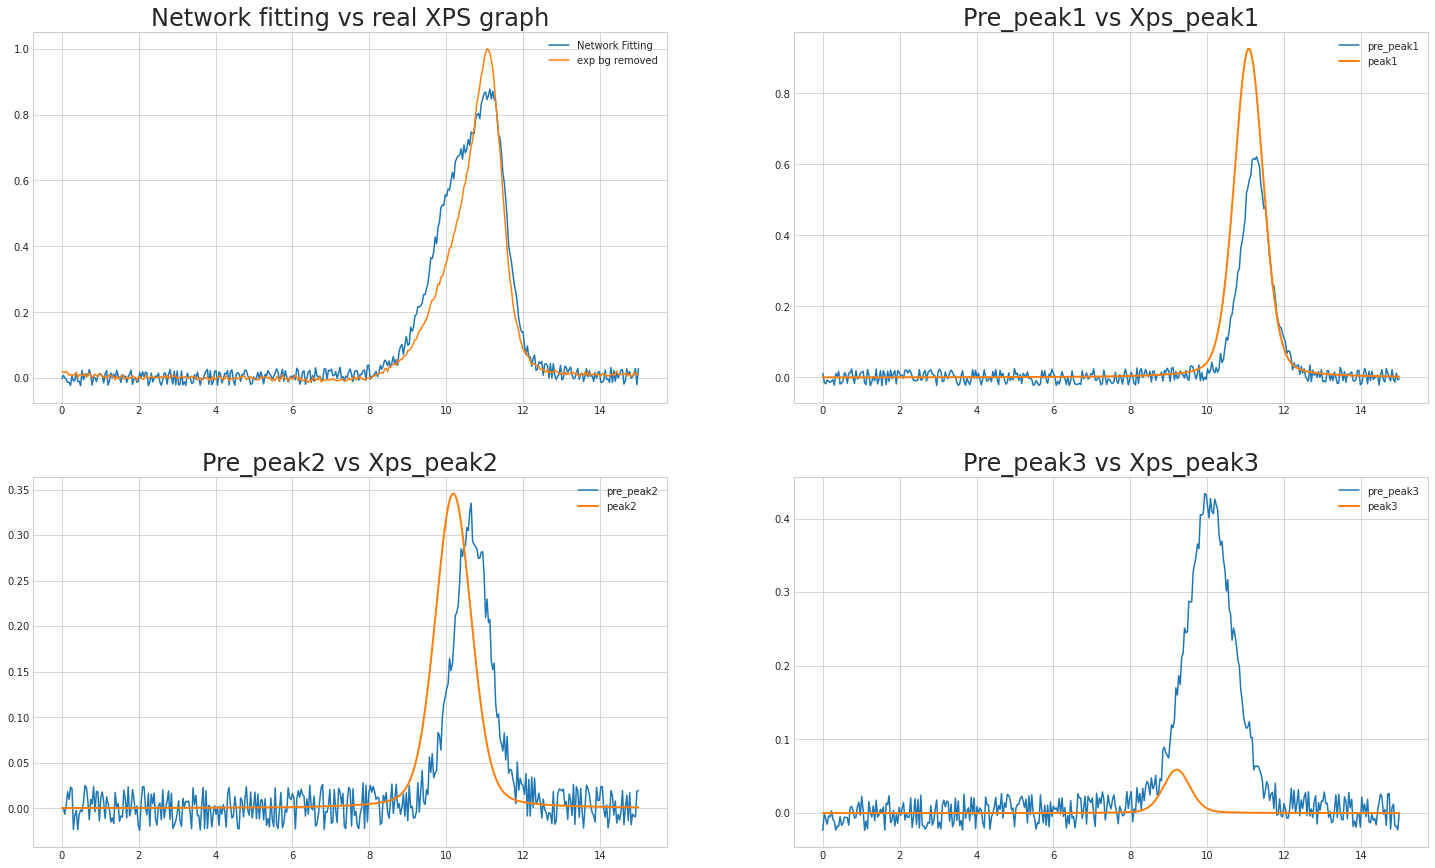

In [79]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


plt.subplot(224)
plt.plot(x, voigt(x, *predict_params[6:]), label = 'pre_peak3')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()
plt.show()




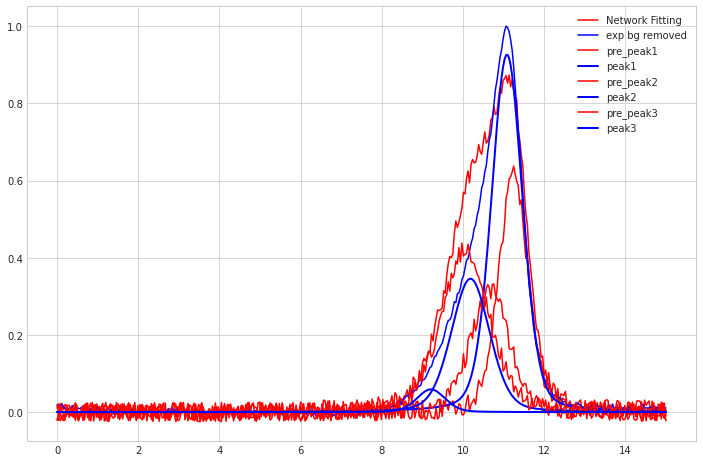

In [80]:
plt.figure(figsize = (12, 8))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')


plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1',  color = 'red')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color = 'blue')


plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2',  color = 'red')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2, color = 'blue')

plt.plot(x, voigt(x, *predict_params[6:]), label = 'pre_peak3',  color = 'red')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2, color = 'blue')

plt.legend()
plt.show()



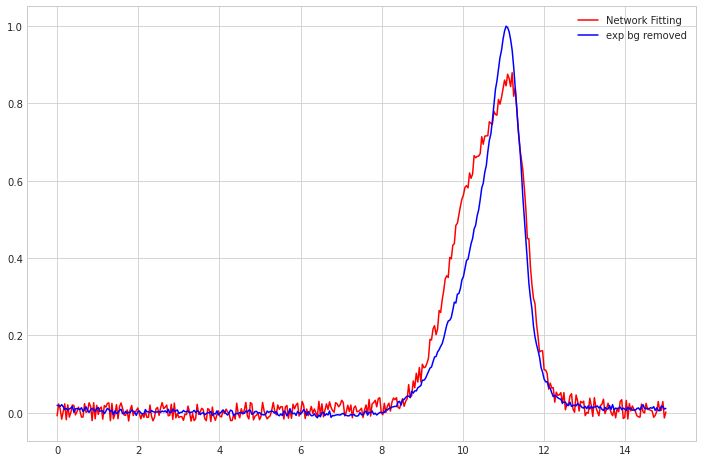

In [81]:
plt.figure(figsize = (12, 8))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')

plt.legend()
plt.show()



In [82]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

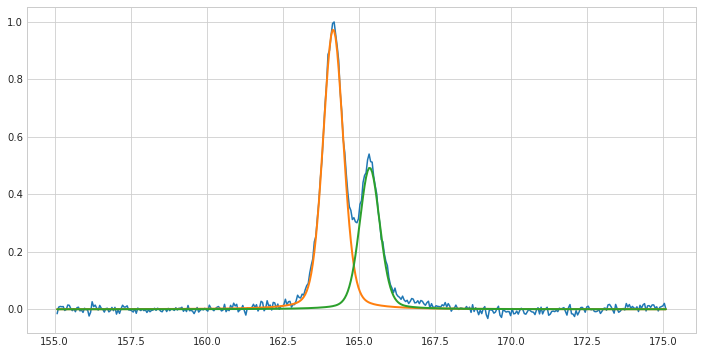

In [83]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)


In [84]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [85]:
predict = model.predict(test_result)
print(predict)

[array([[2.111652]], dtype=float32), array([[0.9408377 , 0.46862733, 0.00103779]], dtype=float32), array([[8.269871 , 7.3458033, 0.8344078]], dtype=float32), array([[ 0.68262684,  0.60912555, -0.098262  ]], dtype=float32)]


In [86]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [87]:
new_predict

[array([2.111652], dtype=float32),
 array([0.9408377 , 0.46862733, 0.00103779], dtype=float32),
 array([8.269871 , 7.3458033, 0.8344078], dtype=float32),
 array([ 0.68262684,  0.60912555, -0.098262  ], dtype=float32)]

In [88]:
print(new_predict[0].shape)  
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
                             # width

(1,)
(3,)
(3,)
(3,)


In [89]:
peak_1 = [new_predict[1][0], new_predict[2][0], new_predict[3][0]]
peak_2 = [new_predict[1][1], new_predict[2][1], new_predict[3][1]]
peak_3 = [new_predict[1][2], new_predict[2][2], new_predict[3][2]]

predict_params = peak_1 + peak_2 + peak_3

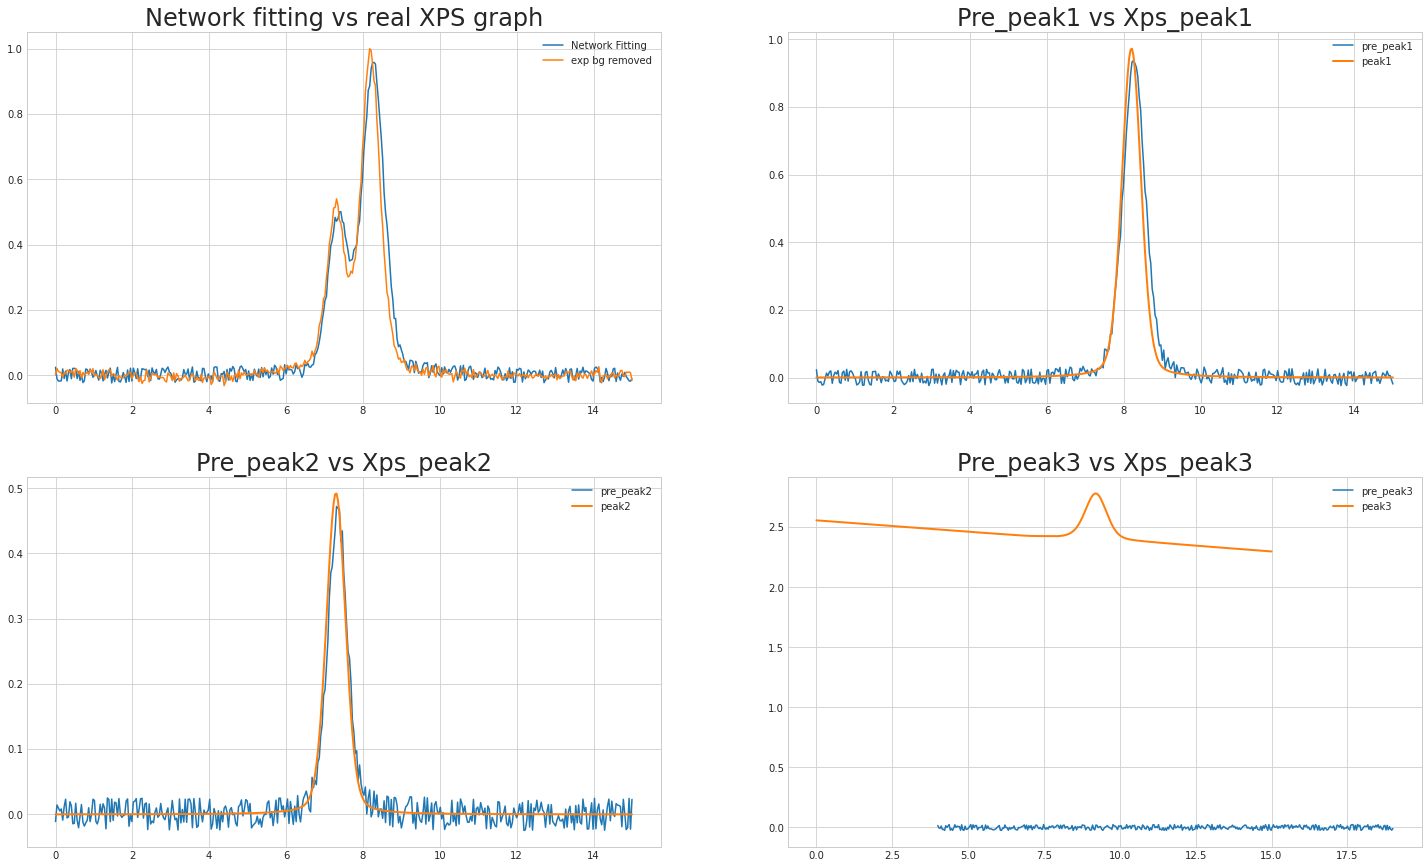

In [90]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


plt.subplot(224)
plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()
plt.show()



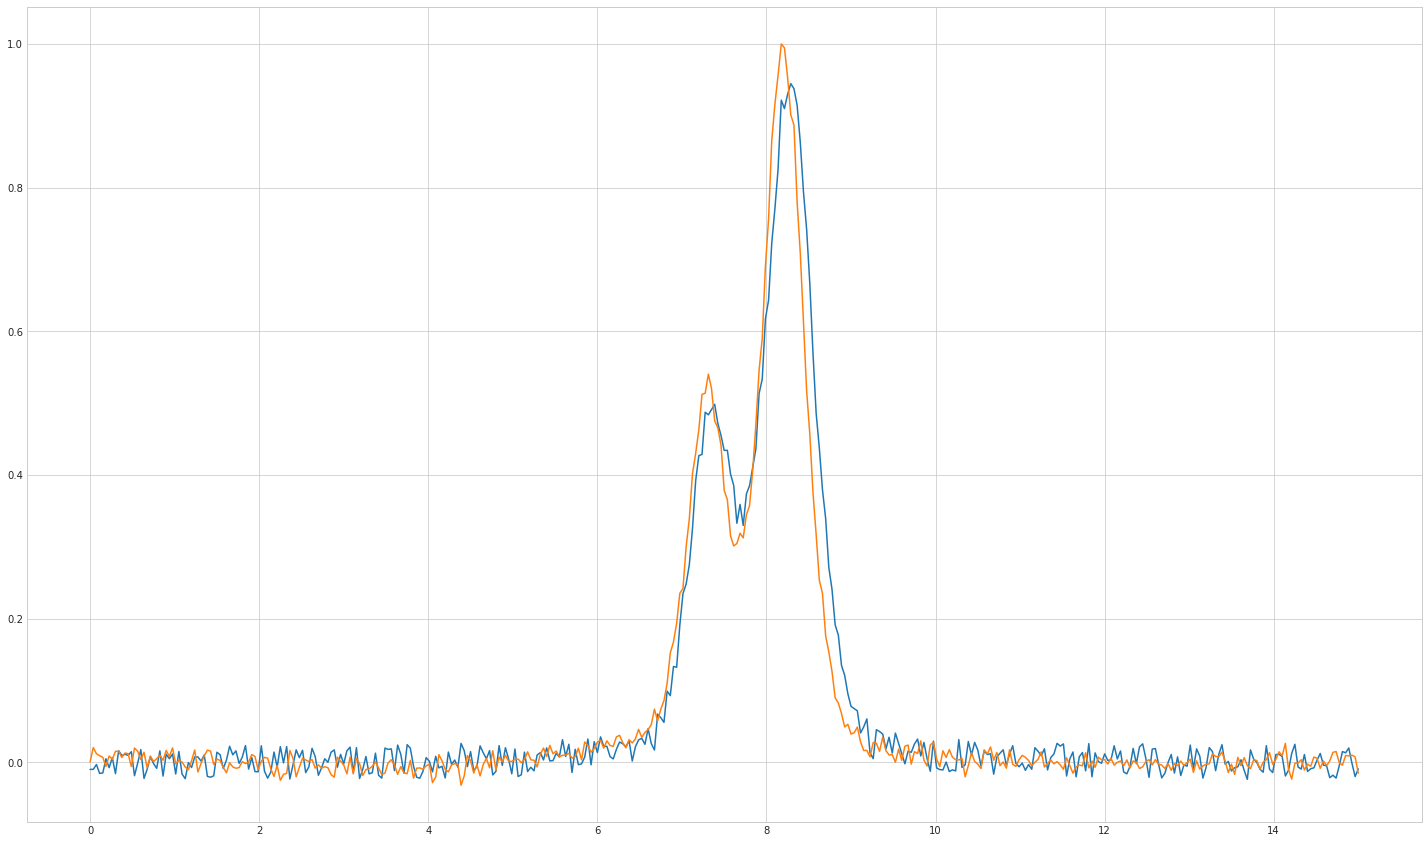

In [91]:
plt.figure(figsize = (25, 15))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")


